### Analise de sentimentos pela base de dados do iemocap

# 1 - Bibliotecas

In [1]:
# vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification model
from sklearn.metrics import confusion_matrix, classification_report, f1_score # performance evaluation criteria
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from sklearn import metrics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2 - Visualização dos dados

In [3]:
data = pd.read_csv("data")

data.head(50)

,Session_ID,Time_Record,Transcription
0,Ses01F_impro01_F000,[006.2901-008.2357]:,Excuse me.
1,Ses01F_impro01_M000,[007.5712-010.4750]:,Do you have your forms?
2,Ses01F_impro01_F001,[010.0100-011.3925]:,Yeah.
3,Ses01F_impro01_M001,[010.9266-014.6649]:,Let me see them.
4,Ses01F_impro01_F002,[014.8872-018.0175]:,Is there a problem?
5,Ses01F_impro01_M002,[016.8352-019.7175]:,Who told you to get in this line?
6,Ses01F_impro01_F003,[019.2900-020.7875]:,You did.
7,Ses01F_impro01_F004,[021.3257-024.7400]:,You were standing at the beginning and you dir...
8,Ses01F_impro01_M003,[023.4700-028.0300]:,Okay. But I didn't tell you to get in this lin...
9,Ses01F_impro01_F005,[027.4600-031.4900]:,Well what's the problem? Let me change it.


In [4]:
data.shape

(10239, 3)

In [5]:
target = pd.read_csv("target")

target.head(50)

,Session_ID,Sentiment,Valence,Activation,Dominance
0,Ses01F_impro01_F000,neu,2.5,2.5,2.5
1,Ses01F_impro01_F001,neu,2.5,2.5,2.5
2,Ses01F_impro01_F002,neu,2.5,2.5,2.5
3,Ses01F_impro01_F003,xxx,2.5,3.0,3.0
4,Ses01F_impro01_F004,xxx,2.5,3.0,2.5
5,Ses01F_impro01_F005,neu,2.5,3.5,2.0
6,Ses01F_impro01_F006,fru,2.0,3.5,3.5
7,Ses01F_impro01_F007,fru,2.5,3.5,3.5
8,Ses01F_impro01_F008,fru,2.0,3.5,3.5
9,Ses01F_impro01_F009,fru,2.0,3.5,3.0


### Note que estamos fazendo o merge pelo id, e descartamos as linhas que não tem sentimento mapeado.

### Fazemos o merge e removemos linhas que não tem id associado.

In [6]:
merged = pd.merge(data,target,on = "Session_ID")

merged.head(50)

,Session_ID,Time_Record,Transcription,Sentiment,Valence,Activation,Dominance
0,Ses01F_impro01_F000,[006.2901-008.2357]:,Excuse me.,neu,2.5,2.5,2.5
1,Ses01F_impro01_M000,[007.5712-010.4750]:,Do you have your forms?,fru,2.5,2.0,2.5
2,Ses01F_impro01_F001,[010.0100-011.3925]:,Yeah.,neu,2.5,2.5,2.5
3,Ses01F_impro01_M001,[010.9266-014.6649]:,Let me see them.,fru,2.5,2.0,2.5
4,Ses01F_impro01_F002,[014.8872-018.0175]:,Is there a problem?,neu,2.5,2.5,2.5
5,Ses01F_impro01_M002,[016.8352-019.7175]:,Who told you to get in this line?,fru,2.0,3.5,3.5
6,Ses01F_impro01_F003,[019.2900-020.7875]:,You did.,xxx,2.5,3.0,3.0
7,Ses01F_impro01_F004,[021.3257-024.7400]:,You were standing at the beginning and you dir...,xxx,2.5,3.0,2.5
8,Ses01F_impro01_M003,[023.4700-028.0300]:,Okay. But I didn't tell you to get in this lin...,fru,2.5,3.5,3.5
9,Ses01F_impro01_F005,[027.4600-031.4900]:,Well what's the problem? Let me change it.,neu,2.5,3.5,2.0


In [7]:
merged.shape

(10039, 7)

In [8]:
merged.groupby("Sentiment").count()

,Session_ID,Time_Record,Transcription,Valence,Activation,Dominance
Sentiment,,,,,,
ang,1103,1103,1103,1103,1103,1103
dis,2,2,2,2,2,2
exc,1041,1041,1041,1041,1041,1041
fea,40,40,40,40,40,40
fru,1849,1849,1849,1849,1849,1849
hap,595,595,595,595,595,595
neu,1708,1708,1708,1708,1708,1708
oth,3,3,3,3,3,3
sad,1084,1084,1084,1084,1084,1084


# Limpeza dos dados

Analisando os dados previamente, alguns problemas foram detectados:
    * xxx sentimento indefinido
    * oth baixa informações
    * dis baixa informações

In [9]:
merged = merged[merged['Sentiment'] != "xxx"]
merged = merged[merged['Sentiment'] != 'oth']
merged = merged[merged['Sentiment'] != 'dis']

merged.groupby("Sentiment").count()

,Session_ID,Time_Record,Transcription,Valence,Activation,Dominance
Sentiment,,,,,,
ang,1103,1103,1103,1103,1103,1103
exc,1041,1041,1041,1041,1041,1041
fea,40,40,40,40,40,40
fru,1849,1849,1849,1849,1849,1849
hap,595,595,595,595,595,595
neu,1708,1708,1708,1708,1708,1708
sad,1084,1084,1084,1084,1084,1084
sur,107,107,107,107,107,107


### Vamos discretizar os valores dos sentimentos

In [10]:
def retorna_label(text):
    dici = {"neu":0,"fru":1,"ang":2,"sad":3,"hap":4,"sur":5,"exc":6,"fea":7}
    return dici[text]

In [11]:
merged['discrete'] = merged['Sentiment'].apply(retorna_label)

In [12]:
merged.shape

(7527, 8)

In [13]:
merged.head()

,Session_ID,Time_Record,Transcription,Sentiment,Valence,Activation,Dominance,discrete
0,Ses01F_impro01_F000,[006.2901-008.2357]:,Excuse me.,neu,2.5,2.5,2.5,0
1,Ses01F_impro01_M000,[007.5712-010.4750]:,Do you have your forms?,fru,2.5,2.0,2.5,1
2,Ses01F_impro01_F001,[010.0100-011.3925]:,Yeah.,neu,2.5,2.5,2.5,0
3,Ses01F_impro01_M001,[010.9266-014.6649]:,Let me see them.,fru,2.5,2.0,2.5,1
4,Ses01F_impro01_F002,[014.8872-018.0175]:,Is there a problem?,neu,2.5,2.5,2.5,0


In [14]:
merged.describe().T

,count,mean,std,min,25%,50%,75%,max
Valence,7527.0,2.745450,0.908585,1.0,2.0,2.5,3.5,5.5
Activation,7527.0,3.107181,0.724216,1.0,2.5,3.0,3.5,5.0
Dominance,7527.0,3.199205,0.803800,0.5,2.5,3.0,4.0,5.0
discrete,7527.0,2.225056,2.009238,0.0,1.0,2.0,3.0,7.0


In [15]:
merged.corr()

,Valence,Activation,Dominance,discrete
Valence,1.000000,0.003217,-0.197505,0.436825
Activation,0.003217,1.000000,0.570118,0.238117
Dominance,-0.197505,0.570118,1.000000,0.071766
discrete,0.436825,0.238117,0.071766,1.000000


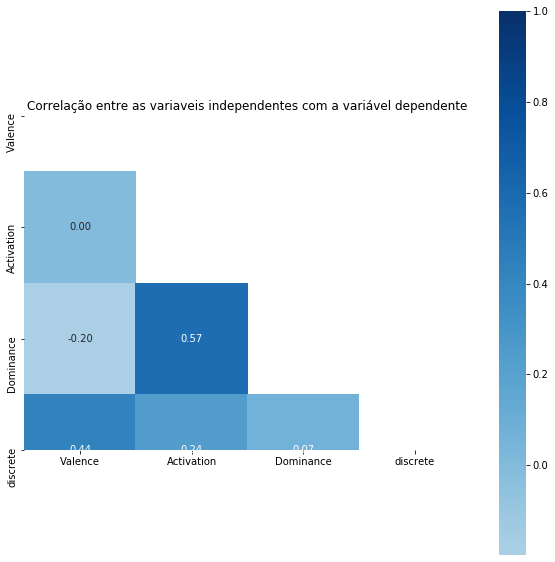

In [16]:
correlation = merged.corr(method='pearson')


mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()
ax.set_title("Correlação entre as variaveis independentes com a variável dependente")
ax.figure.set_size_inches(10,10)
sns.heatmap(correlation, ax=ax, annot=True, mask=mask, fmt='.2f', cbar=True, square=True, cmap=plt.cm.Blues, center=0.1)

In [17]:
merged.to_csv("dadosMerged.csv",index=False)

# Pré-Processamento

In [18]:
import nltk
nltk.download('stopwords')
from sklearn import re #regular expression for text processing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
#from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist 
# vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification model
from sklearn.metrics import confusion_matrix, classification_report, f1_score # performance evaluation criteria

[nltk_data] Downloading package stopwords to /home/joao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict

In [20]:

from nltk.stem import RSLPStemmer
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmed = nltk.stem.SnowballStemmer("english")

def normalizer(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    #tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [stemmer.stem(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

In [21]:
merged['Transcription'] = merged.Transcription.apply(normalizer) #não obteve melhoras com lemmatize dos dados

In [22]:
merged.head()

,Session_ID,Time_Record,Transcription,Sentiment,Valence,Activation,Dominance,discrete
0,Ses01F_impro01_F000,[006.2901-008.2357]:,excus me,neu,2.5,2.5,2.5,0
1,Ses01F_impro01_M000,[007.5712-010.4750]:,do you have your form,fru,2.5,2.0,2.5,1
2,Ses01F_impro01_F001,[010.0100-011.3925]:,yeah,neu,2.5,2.5,2.5,0
3,Ses01F_impro01_M001,[010.9266-014.6649]:,let me see them,fru,2.5,2.0,2.5,1
4,Ses01F_impro01_F002,[014.8872-018.0175]:,is there a problem,neu,2.5,2.5,2.5,0


### Vamos plotar um gráfico com redução da dimensionalidade para verificar a proximidade dos exemplos de cada classe

In [23]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue',"yellow","beige","black","brown","gray","red"]
        if plot:
            #dici = {"neu":0,"fru":1,"ang":2,"sad":3,"hap":4,"sur":5,"exc":6,"fea":7}
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            oran_patch = mpatches.Patch(color = 'orange',label = 'neutral')
            blue_patch = mpatches.Patch(color = 'blue',label = 'frustrated')
            yellow_patch = mpatches.Patch(color='yellow',label="angry")
            beige_patch = mpatches.Patch(color = "beige",label = "sad")
            black_patch = mpatches.Patch(color = "black", label = "happy")
            brown_patch = mpatches.Patch(color = "brown", label = "suprised")
            gray_patch = mpatches.Patch(color = "gray", label = "excited")
            red_patch = mpatches.Patch(color = "red", label = "fearful")
            plt.legend(handles=[oran_patch, blue_patch,yellow_patch,beige_patch,black_patch,brown_patch,gray_patch,red_patch], prop={'size': 20})

In [24]:
corpus_train, corpus_test, y_train, y_test = train_test_split(merged.Transcription, merged.discrete, test_size=0.2, random_state=7)
vectorizer = CountVectorizer(ngram_range = (1, 3))
#vectorizer = TfidfVectorizer(min_df=10) resultado final piora
X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.transform(corpus_test)

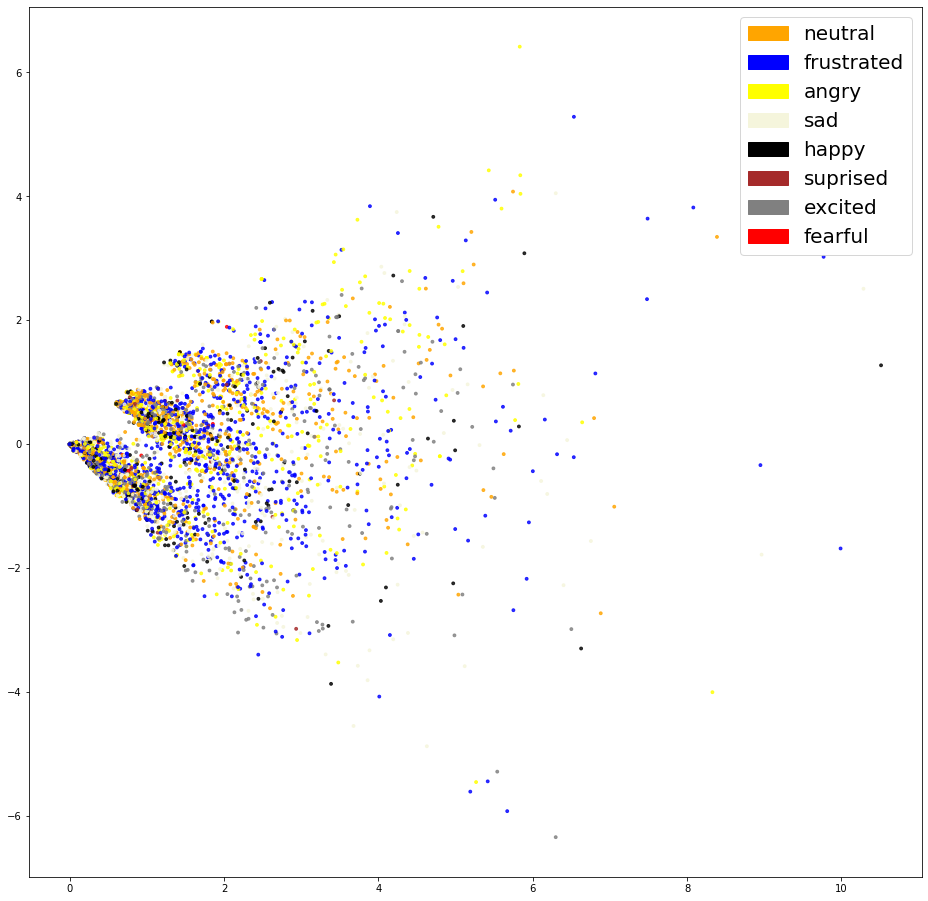

In [25]:
fig = plt.figure(figsize=(16, 16))    
plot_LSA(X_train,y_train)

## Modelo : Logistic Regression

In [26]:
model = LogisticRegression(penalty="l2", C=1.0)
model.fit(X_train, y_train)

/home/joao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/joao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.5617529880478087

In [28]:
resultados = cross_val_predict(model, X_train, y_train, cv = 10)

/home/joao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/joao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


####  Lembrando que:
    - precision = true positive / (true positive + false positive)
    - recall    = true positive / (true positive + false negative)
    - f1-score  = 2 * ((precision * recall) / (precision + recall))

In [29]:
sentimentos = [0,1,2,3,4,5,6,7]
print(metrics.classification_report(y_train, resultados, sentimentos))

              precision    recall  f1-score   support

           0       0.45      0.58      0.51      1352
           1       0.48      0.55      0.51      1482
           2       0.59      0.50      0.54       882
           3       0.58      0.51      0.54       898
           4       0.53      0.32      0.40       479
           5       0.52      0.13      0.21        83
           6       0.56      0.50      0.53       816
           7       0.60      0.31      0.41        29

    accuracy                           0.51      6021
   macro avg       0.54      0.42      0.46      6021
weighted avg       0.52      0.51      0.51      6021



## Modelo : Naive Bayes Classifier

In [30]:
vectorizer = CountVectorizer(ngram_range = (1, 3))
modelo = MultinomialNB()
modelo.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
resultados = cross_val_predict(modelo, X_train, y_train, cv = 10)

In [32]:
sentimentos = [0,1,2,3,4,5,6,7]
print(metrics.classification_report(y_train, resultados, sentimentos))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51      1352
           1       0.45      0.67      0.54      1482
           2       0.63      0.50      0.56       882
           3       0.63      0.48      0.55       898
           4       0.57      0.24      0.33       479
           5       0.00      0.00      0.00        83
           6       0.56      0.53      0.55       816
           7       0.50      0.03      0.06        29

    accuracy                           0.52      6021
   macro avg       0.48      0.37      0.39      6021
weighted avg       0.53      0.52      0.51      6021



# Modelo : Perceptron

In [33]:
from sklearn.linear_model import Perceptron

In [34]:
perceptron = Perceptron()
perceptron.fit(X_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
resultados_perceptron = cross_val_predict(perceptron, X_train, y_train, cv = 10)

In [36]:
print(metrics.classification_report(y_train, resultados_perceptron, sentimentos))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47      1352
           1       0.46      0.50      0.48      1482
           2       0.55      0.48      0.52       882
           3       0.53      0.52      0.53       898
           4       0.41      0.34      0.37       479
           5       0.19      0.24      0.22        83
           6       0.52      0.49      0.50       816
           7       0.08      0.48      0.13        29

    accuracy                           0.48      6021
   macro avg       0.40      0.44      0.40      6021
weighted avg       0.49      0.48      0.48      6021



# Modelo :  decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree.score(X_test, y_test)

0.42695883134130147

In [39]:
resultados_tree_decision = cross_val_predict(decision_tree, X_train, y_train, cv = 10)

In [40]:
print(metrics.classification_report(y_train, resultados_tree_decision, sentimentos))

              precision    recall  f1-score   support

           0       0.40      0.46      0.43      1352
           1       0.43      0.48      0.45      1482
           2       0.49      0.42      0.45       882
           3       0.44      0.41      0.43       898
           4       0.38      0.32      0.35       479
           5       0.23      0.25      0.24        83
           6       0.39      0.34      0.37       816
           7       0.41      0.31      0.35        29

    accuracy                           0.42      6021
   macro avg       0.40      0.38      0.38      6021
weighted avg       0.42      0.42      0.42      6021



In [55]:
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [62]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier
ensemble_lin_rbf = VotingClassifier(estimators=[('NB', MultinomialNB()),                                            
                                              ('LR', LogisticRegression(penalty="l2", C=1.0)),
                                                ('P',Perceptron()),
                                             ], 
                       voting='hard').fit(X_train, y_train)
print('Accuracy:', ensemble_lin_rbf.score(X_train, y_train))


/home/joao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/joao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.8955323036040524


In [57]:
from sklearn.ensemble import BaggingClassifier

In [61]:
#Bagged DecisionTree
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state = 0, n_estimators = 100)
#model.fit(X_train, y_train)
#prediction = model.predict(X_test)
#print('The accuracy for bagged Decision Tree is:', accuracy_score(prediction, y_test))

# Modelo deep learning.

In [45]:
X = merged['Transcription']
Y = merged['Sentiment']

In [46]:
corpus_train, corpus_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
vectorizer = CountVectorizer(ngram_range = (1, 3))
X_train_keras = vectorizer.fit_transform(corpus_train)
X_test_keras = vectorizer.transform(corpus_test)
y_train_keras = vectorizer.fit_transform(y_train)
y_test_keras = vectorizer.transform(y_test)